# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number: Business Problem Name

**Student Name:** Duong Ngoc Phuong Trang

**Student ID:** 223990468

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

*Use this section to introduce the business problem, data set, method, experiments, and obtained results*

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Carry out necessary data preprocessing and exploration.*

In [1]:
# Import necessary libraries
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the dataset
file_path = '/Part1_house_price.csv'
data_task1 = pd.read_csv(file_path)

In [6]:
data_task1.set_index('id', inplace=True)
print('Number of records read: ', data_task1.size)

Number of records read:  400000


In [7]:
# Display basic information about the dataset
print(data_task1.info())
data_task1.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 7129300520 to 3566800485
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20000 non-null  object 
 1   price          20000 non-null  float64
 2   bedrooms       20000 non-null  int64  
 3   bathrooms      20000 non-null  float64
 4   sqft_living    20000 non-null  int64  
 5   sqft_lot       20000 non-null  int64  
 6   floors         20000 non-null  float64
 7   waterfront     20000 non-null  int64  
 8   view           20000 non-null  int64  
 9   condition      20000 non-null  int64  
 10  grade          20000 non-null  int64  
 11  sqft_above     20000 non-null  int64  
 12  sqft_basement  20000 non-null  int64  
 13  yr_built       20000 non-null  int64  
 14  yr_renovated   20000 non-null  int64  
 15  zipcode        20000 non-null  int64  
 16  lat            20000 non-null  float64
 17  long           20000 non-null  float64
 1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [8]:
# Finding column types
data_task1.dtypes


,0
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [9]:
# Identification of missing values
missing = data_task1.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

,0


In [10]:
# Convert 'date' to datetime and extract day, year, month
data_task1['date'] = pd.to_datetime(data_task1['date'])
data_task1['year'] = data_task1['date'].dt.year
data_task1['month'] = data_task1['date'].dt.month
data_task1['day'] = data_task1['date'].dt.day
data_task1 = data_task1.drop(['date'], axis=1)

In [11]:
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
train_data1, valid_data1 = train_test_split(data_task1,
                                      test_size=valid_size,
                                      random_state=2024)

In [12]:
label = 'price'
y_train_data1 = train_data1[[label]]
x_train_data1 = train_data1.drop(label, axis=1)
y_valid_data1 = valid_data1[[label]]
x_valid_data1 = valid_data1.drop(label, axis=1)

print('Size of training set: ', len(x_train_data1))
print('Size of validation set: ', len(x_valid_data1))

Size of training set:  14000
Size of validation set:  6000


In [13]:
print('Missing training values before imputation = ', x_train_data1.isnull().sum().sum())
print('Missing validation values before imputation = ', x_valid_data1.isnull().sum().sum())

Missing training values before imputation =  0
Missing validation values before imputation =  0


In [14]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(x_train_data1)
x_train_data1 = pd.DataFrame(scaler.transform(x_train_data1),
                            columns = x_train_data1.columns, index = x_train_data1.index)
x_valid_data1 = pd.DataFrame(scaler.transform(x_valid_data1),
                            columns = x_valid_data1.columns, index = x_valid_data1.index)

print('X train task1 min =', round(x_train_data1.min().min(),4), '; max =', round(x_train_data1.max().max(), 4))
print('X valid task1 min =', round(x_valid_data1.min().min(),4), '; max =', round(x_valid_data1.max().max(), 4))

X train task1 min = 0.0 ; max = 1.0
X valid task1 min = -0.0033 ; max = 1.1671


<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
lr_model = LinearRegression()
lr_model.fit(x_train_data1, y_train_data1)

LinearRegression()

In [17]:
y_train_pred = lr_model.predict(x_train_data1)
y_valid_pred = lr_model.predict(x_valid_data1)

In [18]:
mse_train_task1 = mean_squared_error(y_train_data1, y_train_pred)
mae_train_task1 = mean_absolute_error(y_train_data1, y_train_pred)
mse_valid_task1 = mean_squared_error(y_valid_data1, y_valid_pred)
mae_valid_task1 = mean_absolute_error(y_valid_data1, y_valid_pred)

print('Linear Regression:')
print('Train MSE task1: ', round(mse_train_task1, 2), ', Train MAE task1: ', round(mae_train_task1, 2))
print('Validation MSE task1: ', round(mse_valid_task1, 2), ', Validation MAE task1: ', round(mae_valid_task1, 2))

Linear Regression:
Train MSE task1:  39369572376.89 , Train MAE task1:  124935.1
Validation MSE task1:  41515624097.5 , Validation MAE task1:  125767.85


MLP

In [19]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop, Adam

In [20]:
# Convert Pandas DataFrames to NumPy arrays (if not already done)
x_train_arr1 = np.array(x_train_data1)
y_train_arr1 = np.array(y_train_data1)
x_valid_arr1 = np.array(x_valid_data1)
y_valid_arr1 = np.array(y_valid_data1)

print('Training shape task1:', x_train_arr1.shape)
print('Training samples task1: ', x_train_arr1.shape[0])
print('Validation samples task1: ', x_valid_arr1.shape[0])

Training shape task1: (14000, 21)
Training samples task1:  14000
Validation samples task1:  6000


In [21]:
def basic_mlp_model(x_size, y_size):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_size,)))
    model.add(Dense(y_size))  # Output layer
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[metrics.mae])
    return model

In [22]:
def advanced_mlp_model(x_size, y_size):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(x_size,)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_size))  # Output layer
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[metrics.mae])
    return model

In [23]:
# Choose the model to train
model_1 = basic_mlp_model(x_train_arr1.shape[1], y_train_arr1.shape[1])
model_1.summary()

print("\nTraining Basic MLP Model:")
# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Training the model
history_1 = model_1.fit(
    x_train_arr1, y_train_arr1,
    batch_size=64,
    epochs=500,
    validation_data=(x_valid_arr1, y_valid_arr1),
    verbose=2,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)


Training Basic MLP Model:
Epoch 1/500
219/219 - 2s - 9ms/step - loss: 421869879296.0000 - mean_absolute_error: 536742.8125 - val_loss: 418622636032.0000 - val_mean_absolute_error: 532762.4375
Epoch 2/500
219/219 - 1s - 4ms/step - loss: 421792120832.0000 - mean_absolute_error: 536674.5000 - val_loss: 418506833920.0000 - val_mean_absolute_error: 532659.6875
Epoch 3/500
219/219 - 0s - 2ms/step - loss: 421638242304.0000 - mean_absolute_error: 536538.9375 - val_loss: 418315960320.0000 - val_mean_absolute_error: 532490.3125
Epoch 4/500
219/219 - 0s - 2ms/step - loss: 421410373632.0000 - mean_absolute_error: 536337.2500 - val_loss: 418054799360.0000 - val_mean_absolute_error: 532258.5000
Epoch 5/500
219/219 - 1s - 3ms/step - loss: 421115691008.0000 - mean_absolute_error: 536077.5625 - val_loss: 417729511424.0000 - val_mean_absolute_error: 531969.6250
Epoch 6/500
219/219 - 1s - 3ms/step - loss: 420758421504.0000 - mean_absolute_error: 535764.1250 - val_loss: 417345339392.0000 - val_mean_absol

In [24]:
# Choose the model to train
model_2 = advanced_mlp_model(x_train_arr1.shape[1], y_train_arr1.shape[1])
model_2.summary()

print("\nTraining Advanced MLP Model:")
# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Training the model
history_2 = model_2.fit(
    x_train_arr1, y_train_arr1,
    batch_size=64,
    epochs=500,
    validation_data=(x_valid_arr1, y_valid_arr1),
    verbose=2,
    callbacks=[early_stopping]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)


Training Advanced MLP Model:
Epoch 1/500
219/219 - 2s - 10ms/step - loss: 417944731648.0000 - mean_absolute_error: 533220.1875 - val_loss: 396011601920.0000 - val_mean_absolute_error: 512312.4062
Epoch 2/500
219/219 - 1s - 6ms/step - loss: 286696407040.0000 - mean_absolute_error: 393280.5938 - val_loss: 143421800448.0000 - val_mean_absolute_error: 211272.7656
Epoch 3/500
219/219 - 1s - 6ms/step - loss: 112356687872.0000 - mean_absolute_error: 204299.4219 - val_loss: 104169185280.0000 - val_mean_absolute_error: 198724.1406
Epoch 4/500
219/219 - 1s - 4ms/step - loss: 104088453120.0000 - mean_absolute_error: 205366.8906 - val_loss: 100596654080.0000 - val_mean_absolute_error: 197609.0312
Epoch 5/500
219/219 - 1s - 6ms/step - loss: 100004290560.0000 - mean_absolute_error: 201765.7188 - val_loss: 96878952448.0000 - val_mean_absolute_error: 194854.1250
Epoch 6/500
219/219 - 1s - 6ms/step - loss: 95708110848.0000 - mean_absolute_error: 198506.2656 - val_loss: 92741074944.0000 - val_mean_abso

In [25]:
# Evaluate the model
train_score_1 = model_1.evaluate(x_train_arr1, y_train_arr1, verbose=0)
valid_score_1 = model_1.evaluate(x_valid_arr1, y_valid_arr1, verbose=0)

print('MLP Model 1:')
print('Train MAE: ', round(train_score_1[1], 2), ', Train Loss (MSE): ', round(train_score_1[0], 2))
print('Validation MAE: ', round(valid_score_1[1], 2), ', Validation Loss (MSE): ', round(valid_score_1[0], 2))

MLP Model 1:
Train MAE:  171131.19 , Train Loss (MSE):  75921678336.0
Validation MAE:  169298.23 , Validation Loss (MSE):  77666697216.0


In [26]:
# Evaluate the model
train_score_2 = model_2.evaluate(x_train_arr1, y_train_arr1, verbose=0)
valid_score_2 = model_2.evaluate(x_valid_arr1, y_valid_arr1, verbose=0)

print('MLP Model 2:')
print('Train MAE: ', round(train_score_2[1], 2), ', Train Loss (MSE): ', round(train_score_2[0], 2))
print('Validation MAE: ', round(valid_score_2[1], 2), ', Validation Loss (MSE): ', round(valid_score_2[0], 2))

MLP Model 2:
Train MAE:  95019.23 , Train Loss (MSE):  22405017600.0
Validation MAE:  97772.03 , Validation Loss (MSE):  24791244800.0


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


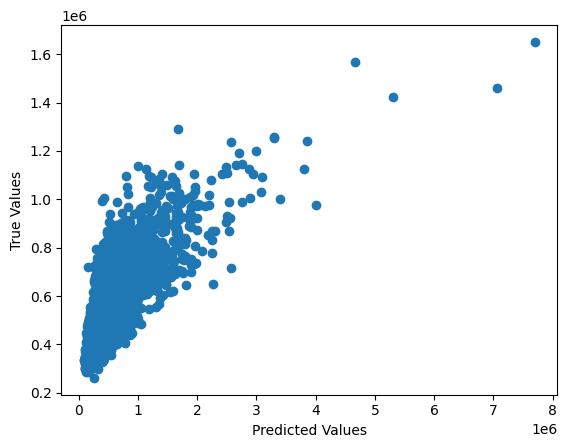

The Correlation between true and predicted values is:  0.754


In [27]:
import matplotlib.pyplot as plt

# Predict on validation set
y_valid_predict_1 = model_1.predict(x_valid_arr1)

# Plot true vs predicted values
plt.scatter(y_valid_arr1, y_valid_predict_1)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# Calculate correlation
corr_result = np.corrcoef(y_valid_arr1.reshape(-1), y_valid_predict_1.reshape(-1))[0, 1]
print('The Correlation between true and predicted values is: ', round(corr_result, 3))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


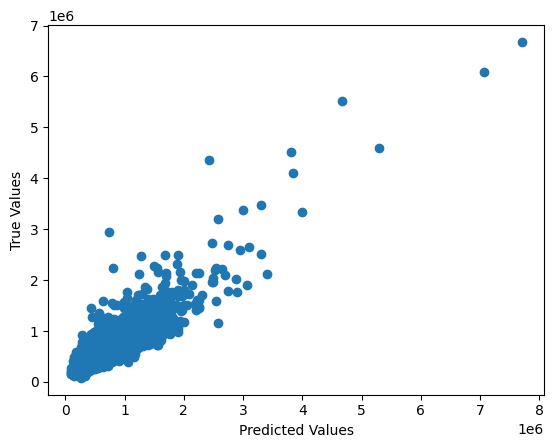

The Correlation between true and predicted values is:  0.903


In [28]:
import matplotlib.pyplot as plt

# Predict on validation set
y_valid_predict_2 = model_2.predict(x_valid_arr1)

# Plot true vs predicted values
plt.scatter(y_valid_arr1, y_valid_predict_2)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# Calculate correlation
corr_result = np.corrcoef(y_valid_arr1.reshape(-1), y_valid_predict_2.reshape(-1))[0, 1]
print('The Correlation between true and predicted values is: ', round(corr_result, 3))

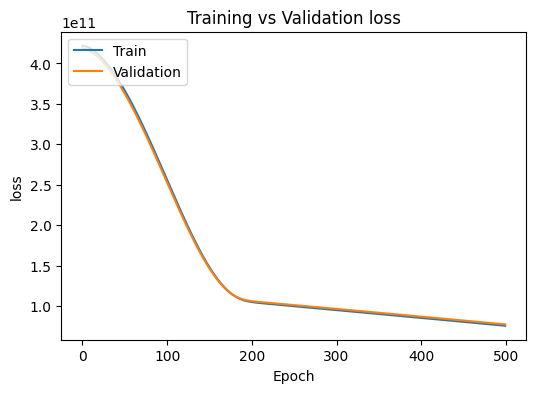

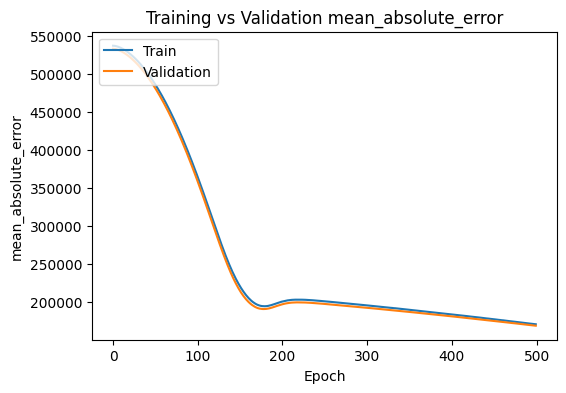

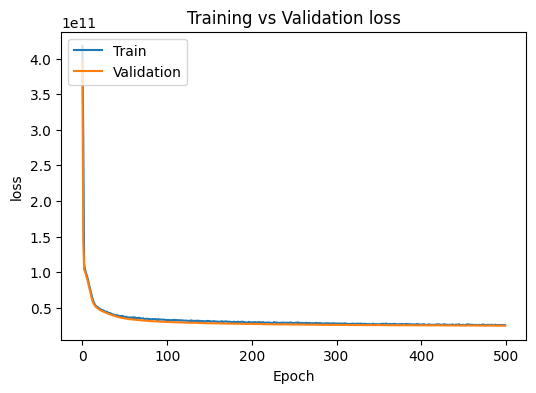

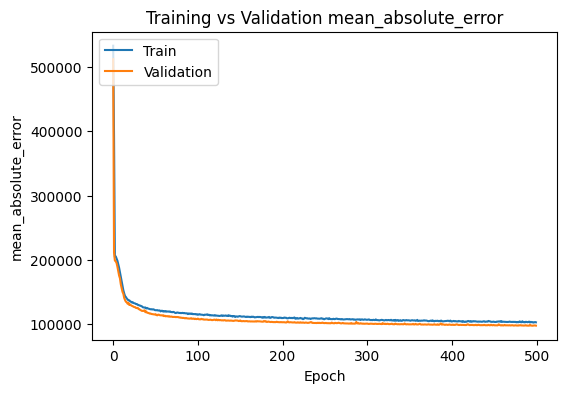

In [29]:
def plot_hist(history, xsize=6, ysize=5):
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    keys = list(history.history.keys())
    n = len(keys) // 2
    train_keys = keys[:n]
    valid_keys = keys[n:]

    for i in range(n):
        plt.plot(history.history[train_keys[i]])
        plt.plot(history.history[valid_keys[i]])
        plt.title(f'Training vs Validation {train_keys[i]}')
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

# Plot the history
plot_hist(history_1, xsize=6, ysize=4)


# Plot the history
plot_hist(history_2, xsize=6, ysize=4)


<a id = "cell_report"></a>
## 4. Experiments Report

*Provide a summary of experimental results, explain the meaning of your result
and how your model can be used to address the related business problem.*